In [72]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import TimeSeriesSplit
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARMA, ARIMA
plt.style.use('ggplot')

In [19]:
# working_df = pd.read_csv('DJIA_equities/GOOGL_2006-01-01_to_2018-01-01.csv', index_col = 'Date', parse_dates=True)
working_df = pd.read_csv('DJIA_equities/GOOGL_2006-01-01_to_2018-01-01.csv')
working_df['Date'] = pd.to_datetime(working_df['Date'], format= '%Y-%m-%d')
working_df.set_index('Date', inplace=True)

In [20]:
working_df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [21]:
working_df['delta_of_high_and_low'] = ((working_df.High - working_df.Low)/working_df.High)*100
working_df.head()
working_df.loc[working_df['delta_of_high_and_low'] >10]

,Open,High,Low,Close,Volume,Name,delta_of_high_and_low
Date,,,,,,,
2006-01-20,219.57,220.24,197.57,199.93,41182889,GOOGL,10.293316
2006-02-28,196.80,198.97,169.42,181.49,39446833,GOOGL,14.851485
2008-09-29,209.96,211.97,190.55,190.69,10764969,GOOGL,10.105204
2008-10-16,166.55,178.43,154.87,176.69,16289267,GOOGL,13.204058
2008-10-28,169.69,184.84,164.42,184.56,8106988,GOOGL,11.047392
2008-11-13,146.03,156.66,140.14,156.20,13239068,GOOGL,10.545130
2010-05-06,254.63,259.02,230.23,249.58,5000043,GOOGL,11.114972
2012-10-18,378.15,380.09,338.34,347.85,12442346,GOOGL,10.984241


In [22]:
working_dfopen = working_df.iloc[:,0:1]
working_dfhigh = working_df.iloc[:, 1:2]
working_dflow = working_df.iloc[:,2:3]
working_dfclose = working_df.iloc[:, 3:4]


<AxesSubplot:xlabel='Date'>

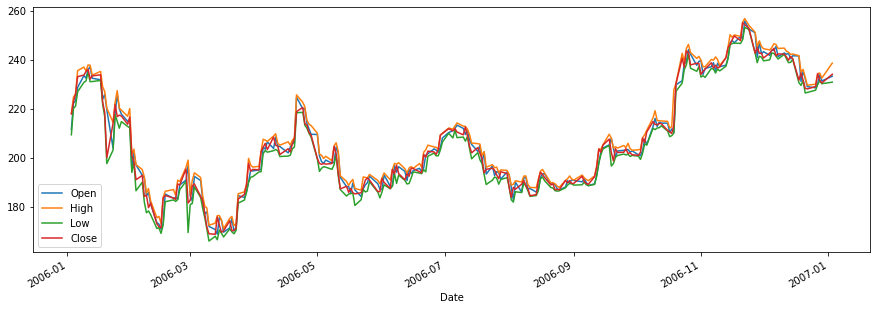

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
working_dfopen['2006-01-03':'2007-01-03'].plot(ax=ax)
working_dfhigh['2006-01-03':'2007-01-03'].plot(ax=ax)
working_dflow['2006-01-03':'2007-01-03'].plot(ax=ax)
working_dfclose['2006-01-03':'2007-01-03'].plot(ax=ax)

In [24]:
year_groups= working_dfopen.groupby(pd.Grouper(freq='A'))

In [25]:
# annual = pd.DataFrame()
# for years, group in year_groups:
#     annual[years.year] = group.values.ravel()
#     print(len(group.values))
#     print(len([years.year]))
# # annual.plot(subplots=True, figsize=(25,10))
# # len(group)

251
1
251
1


ValueError: Length of values (253) does not match length of index (251)

In [ ]:
len(annual.index)

In [ ]:
annual.tail()

In [ ]:
len(year_groups)

In [33]:
results = adfuller(working_dfopen)
results
# currently not stationary

(1.2403644102510585,
 0.9962532356713726,
 27,
 2991,
 {'1%': -3.4325382049645357,
  '5%': -2.8625068071065787,
  '10%': -2.5672846570213257},
 20185.84146337278)

In [34]:
# square root
sqrt_ = np.sqrt(working_dfopen)
sqrt_df = pd.DataFrame(sqrt_, index=working_dfopen.index)
results2 = adfuller(sqrt_df)
results2

(0.4246862637351052,
 0.9823950120954599,
 0,
 3018,
 {'1%': -3.432518611889492,
  '5%': -2.8624981535161758,
  '10%': -2.5672800499499138},
 -2226.7784460477687)

<AxesSubplot:xlabel='Date'>

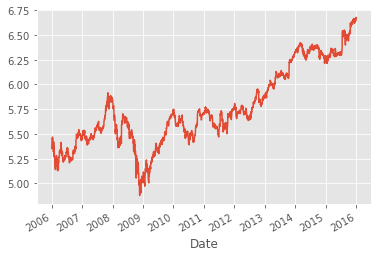

In [36]:
# log transform to remove changes in variance
log_df = np.log(open_df_06_16)
log_df.plot()
# scale dropped

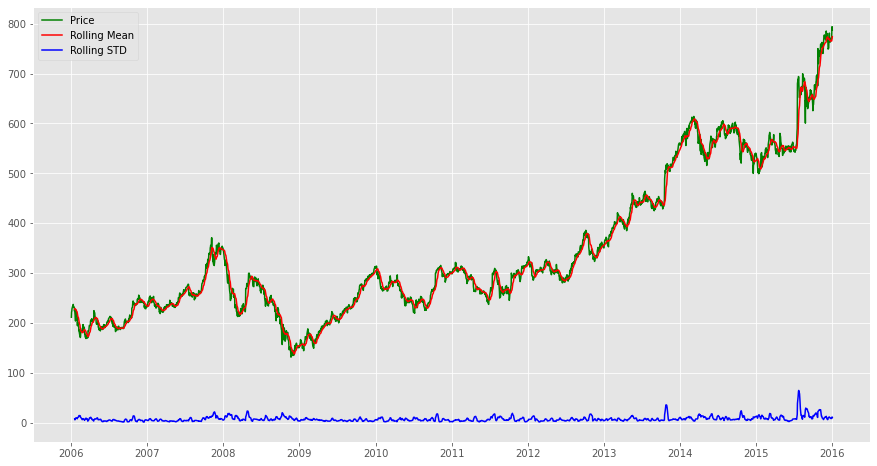

In [44]:
# rolling mead to remove trend
rollmean= open_df_06_16.rolling(window=12, center =False).mean()
rollstd= open_df_06_16.rolling(window=12, center =False).std()

fig = plt.figure(figsize=(15,8))
price = plt.plot(open_df_06_16, color='green', label = "Price")
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='blue', label='Rolling STD')
plt.legend(loc='best')

In [45]:
data_minus_mean =  open_df_06_16-rollmean

In [48]:
data_minus_mean.isna().sum()
data_minus_mean.dropna(inplace=True)

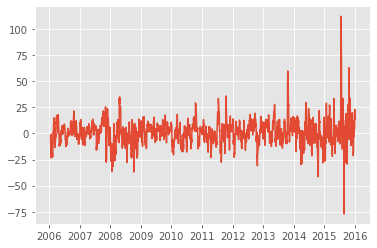

In [49]:
plt.plot(data_minus_mean)

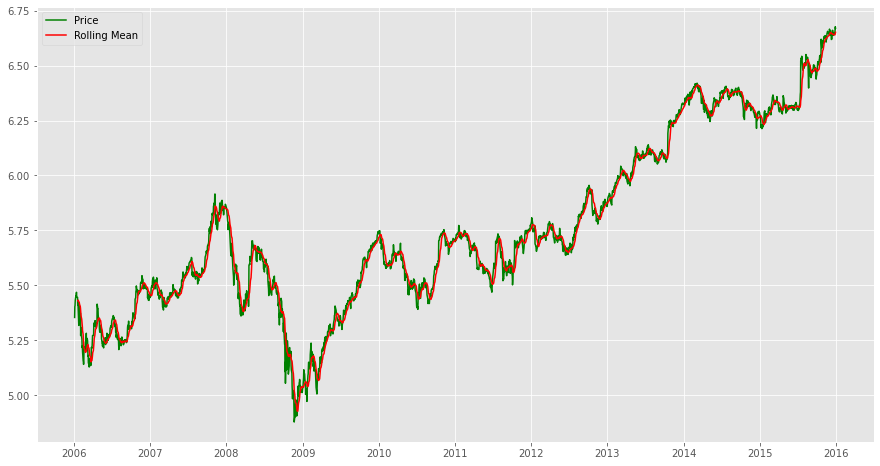

In [52]:
# rolling mean subtraction after log transformation
rollmean_log= log_df.rolling(window=12, center =False).mean()
rollstd_log= log_df.rolling(window=12, center =False).std()

fig = plt.figure(figsize=(15,8))
price = plt.plot(log_df, color='green', label = "Price")
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
# std = plt.plot(rollstd, color='blue', label='Rolling STD')
plt.legend(loc='best')

In [53]:
log_data_minus_mean = log_df-rollmean_log 

In [54]:
log_data_minus_mean.isna().sum()
log_data_minus_mean.dropna(inplace=True)

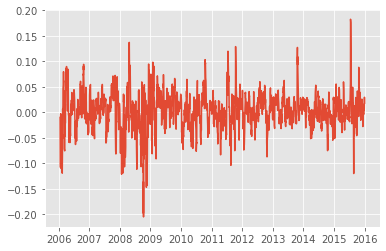

In [55]:
plt.plot(log_data_minus_mean)

In [56]:
results_mean = adfuller(data_minus_mean)
results_mean

(-10.570417923619079,
 7.329836355163421e-19,
 11,
 2493,
 {'1%': -3.4329757705711432,
  '5%': -2.862700050059295,
  '10%': -2.567387539813443},
 15822.666030035285)

In [58]:
results_log = adfuller(log_data_minus_mean)
results_log

(-9.796756102932315,
 6.145182644229701e-17,
 19,
 2485,
 {'1%': -3.4329842325121738,
  '5%': -2.862703786843828,
  '10%': -2.567389529328891},
 -12990.070719420357)

In [26]:
open_df = pd.Series(working_df['Open'], index=working_df.index)
# open_df_06_16 = open_df['2006-01-03':'2016-01-03']

In [ ]:
#adam's function
def dickey(df_df):
    results = adfuller(df_df)

    p_value = results[4]['5%']

    print(f' The test statistic is: {results[0]}')
    print(f' The critical value when alpha is 5% is: {p_value}')
    return

In [63]:
split = round(open_df.shape[0]*0.7)
train = open_df[:split]
test = open_df[split:]
train,test

(Date
 2006-01-03    211.47
 2006-01-04    222.17
 2006-01-05    223.22
 2006-01-06    228.66
 2006-01-09    233.44
                ...  
 2014-05-21    542.90
 2014-05-22    552.20
 2014-05-23    558.13
 2014-05-27    567.78
 2014-05-28    574.57
 Name: Open, Length: 2113, dtype: float64,
 Date
 2014-05-29     573.39
 2014-05-30     571.64
 2014-06-02     569.75
 2014-06-03     560.90
 2014-06-04     551.52
                ...   
 2017-12-22    1070.00
 2017-12-26    1068.64
 2017-12-27    1066.60
 2017-12-28    1062.25
 2017-12-29    1055.49
 Name: Open, Length: 906, dtype: float64)

In [67]:
validation_split = TimeSeriesSplit()
for train_val, train_val_test in validation_split.split(train):
    print(train_val, train_val_test)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
sqrt_df.plot()

In [ ]:
type(working_dfopen.index)

In [ ]:
decomposition = seasonal_decompose(np.log(open_df), freq=300)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(working_dfopen), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [68]:
p=d=q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdqs = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]

In [69]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =30239.098765688614
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =27363.60929078496
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =18276.411531885526
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =18154.684207969713
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =18269.064252900436
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =18253.94779735822
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =18163.655643298927
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =18147.193322568768
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =27373.77933219588
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =24573.942104362555
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =16398.29730252202
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =16298.53667227256
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =16406.60686274334
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =18491.54675415094
ARIMA (0, 0, 

In [70]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic             12924
Name: 59, dtype: object

In [ ]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(open_df_06_16, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(0, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

In [73]:
model_1 = ARIMA(train, order = (1,1,1)).fit()
y_pred = model_1.predict()
y_pred

Date
2006-01-04    0.172013
2006-01-05    0.292065
2006-01-06    0.179461
2006-01-09    0.231940
2006-01-10    0.223290
                ...   
2014-05-21    0.297084
2014-05-22    0.200455
2014-05-23    0.275518
2014-05-27    0.235476
2014-05-28    0.278761
Length: 2112, dtype: float64

In [ ]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [ ]:
pred = output.get_prediction(start=pd.to_datetime('2016-01-04'), dynamic=False)
pred_conf = pred.conf_int()

In [ ]:
rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = open_df_06_16.plot(label='Price')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Predicted Price Value', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.6)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Google Stock Price')
plt.legend()

plt.show()

In [ ]:
# Get the real and predicted values
price_forecasted = pred.predicted_mean
price_truth = open_df['2006-01-03':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasted price is {}'.format(round(mse, 2)))

In [ ]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
